# **Enunciado del Proyecto de Predicción de Supervivencia en el Titanic**

**Contexto:**

El hundimiento del RMS Titanic es uno de los desastres marítimos más famosos de la historia. De los 2,224 pasajeros y tripulantes a bordo, más de 1,500 perdieron la vida. El objetivo de este proyecto es construir un modelo de Machine Learning que pueda predecir si un pasajero habría sobrevivido al desastre en función de varias características como su clase, sexo, edad, y otras variables disponibles en el conjunto de datos.

## **Objetivo:**

El objetivo es predecir la probabilidad de supervivencia de un pasajero basado en las características proporcionadas. Se deberá realizar una limpieza y preparación de datos, seguido de la selección, entrenamiento y evaluación de un modelo de Machine Learning. Los resultados se presentarán a través de métricas y gráficos.

###**Pasos a Seguir:**

**Carga y Exploración de los Datos:**

Cargar el conjunto de datos Titanic disponible en Kaggle.
Realizar un análisis exploratorio de datos (EDA) para entender la estructura y distribución de las variables.

**Preparación y Limpieza de los Datos:**

Identificar y manejar los valores faltantes, especialmente en las variables 'Age', 'Cabin', y 'Embarked'.
Convertir las variables categóricas como 'Sex' y 'Embarked' en variables numéricas.
Crear nuevas características si es necesario (por ejemplo, agrupar edades en rangos).
Dividir el conjunto de datos en entrenamiento y prueba.

**Selección del Modelo y Entrenamiento:**

Seleccionar un modelo de clasificación, como Random Forest o Regresión Logística.
Entrenar el modelo utilizando los datos de entrenamiento.
Ajustar los hiperparámetros para mejorar el rendimiento del modelo.

**Evaluación del Modelo:**

Evaluar el modelo utilizando métricas como precisión, matriz de confusión, y ROC-AUC.
Comparar diferentes modelos si es necesario para seleccionar el más adecuado.

**Visualización de Resultados:**

Graficar la matriz de confusión y la curva ROC.
Visualizar la importancia de las características si se utiliza un modelo basado en árboles de decisión.

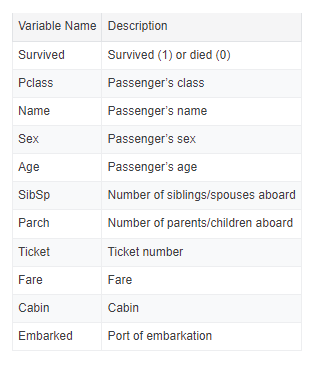

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#cargamos datos
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df=pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#calcular la cantidad de datos faltantes
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns = ['Cabin', 'Ticket', 'Name'], inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
# Codificacion de variables categoricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,False,True,False,False,True
887,888,1,1,19.000000,0,0,30.0000,True,False,False,False,True
888,889,0,3,29.699118,1,2,23.4500,True,False,False,False,True
889,890,1,1,26.000000,0,0,30.0000,False,True,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    bool   
 8   Sex_male     891 non-null    bool   
 9   Embarked_C   891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(5)
memory usage: 53.2 KB


In [ ]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Entrenamiento modelo de random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#matriz de confusion
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", confusion)

# Curva ROC Y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)





Accuracy: 0.8435754189944135
Matriz de confusión:
 [[94 11]
 [17 57]]
AUC: 0.8327541827541827


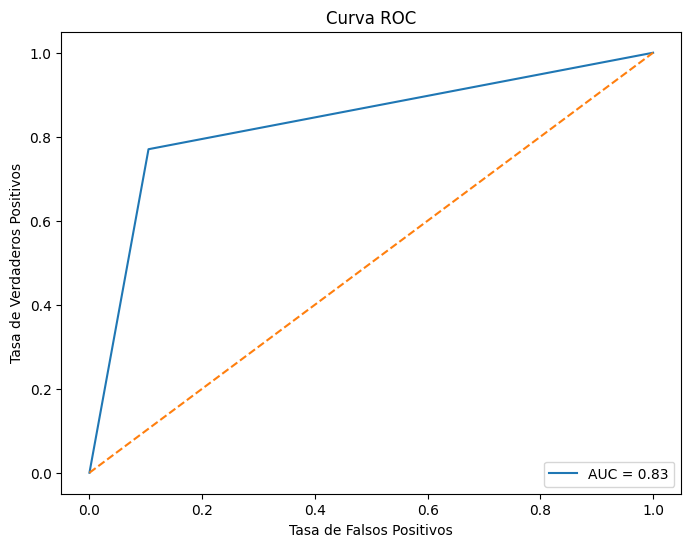

In [ ]:
# visualizacion de resultados
# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle ='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc ='lower right')
plt.show()

Text(20.72222222222222, 0.5, 'Valores reales')

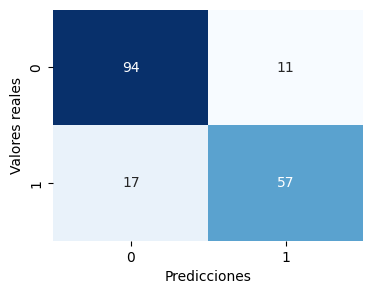

In [ ]:
# graficamos matriz de confusion
plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')